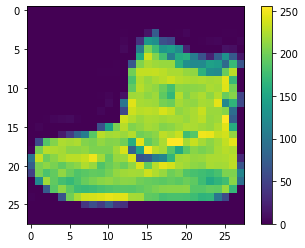

In [31]:
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import keras
from tensorflow.compat.v1.keras.preprocessing import image
tf.disable_v2_behavior()
import cv2

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names=['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag',
            'ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [6]:
train_images=train_images/255.0
test_images=test_images/255.0


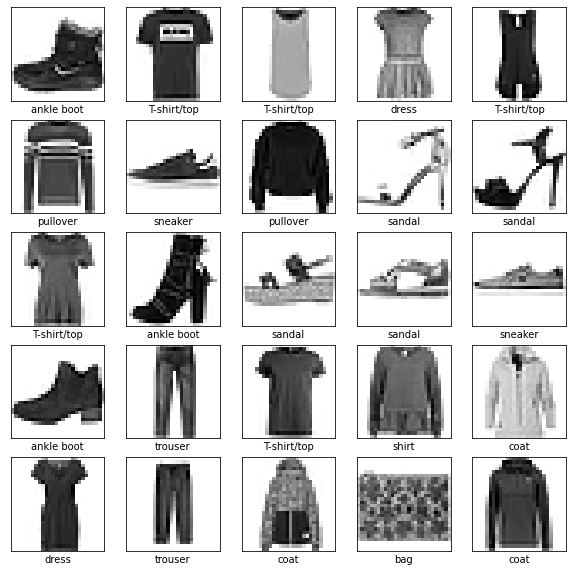

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()    
    

In [39]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 1.0944 - acc: 0.6692
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6487 - acc: 0.7651
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5715 - acc: 0.7938
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5266 - acc: 0.8144
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4972 - acc: 0.8240


In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

c:\users\punyashree a g\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


test accuracy: 0.6702


In [13]:
predictions=model.predict(test_images)

In [14]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [40]:
img=cv2.imread('dress.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
x=np.asarray(img)
x=np.expand_dims(img,axis=0)
val=model.predict(x)
np.argmax(val)




3